In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [44]:
df = pd.read_csv(r'/Users/adityarounak/Desktop/fraud detection /Fraud.csv')



In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [46]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [47]:
df.shape

(6362620, 11)

In [48]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [50]:
df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

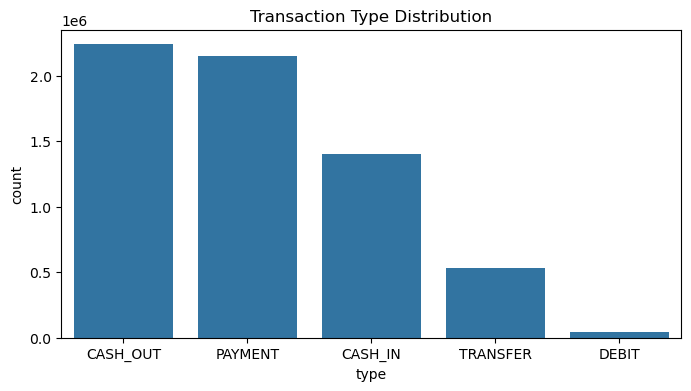

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.show()

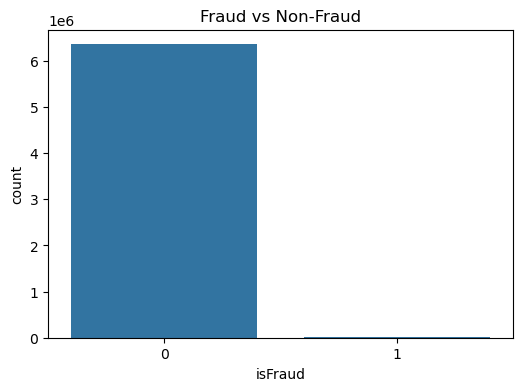

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title('Fraud vs Non-Fraud')
plt.show()

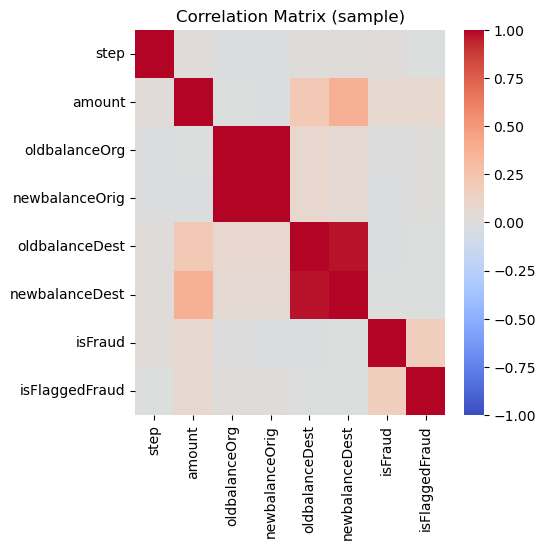

In [53]:
sample_corr = df.select_dtypes(include=[np.number]).sample(n=min(20000, len(df)), random_state=42)
corr = sample_corr.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (sample)')
plt.show()


In [54]:
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [55]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,8.500025e+05


In [56]:
types = ['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']
df['type'] = df['type'].astype(str)
for t in types:
    df[f'type_{t}'] = (df['type'] == t).astype(int)

In [57]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True, errors='ignore')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)
cap_val = df['amount'].quantile(0.995)
df['amount'] = df['amount'].clip(upper=cap_val)

In [58]:
SAMPLE_SIZE = 100000
if len(df) > SAMPLE_SIZE:
    frac = SAMPLE_SIZE / len(df)
    df = df.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42)).reset_index(drop=True)

/var/folders/7k/gp13cjlj1kdb0j5zmlzrn3_r0000gn/T/ipykernel_44327/311350300.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42)).reset_index(drop=True)


In [59]:
feature_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','errorBalanceOrig','errorBalanceDest'] + [f'type_{t}' for t in types]
X = df[feature_cols]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [60]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [61]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [62]:
def evaluate(name, model):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_proba))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29961
           1       0.27      1.00      0.43        39

    accuracy                           1.00     30000
   macro avg       0.64      1.00      0.71     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC: 0.9998121489560359


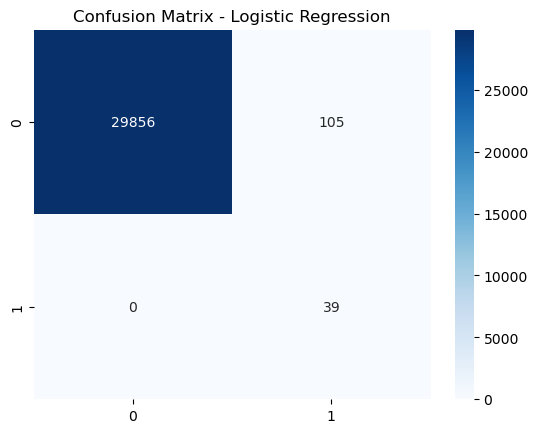

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29961
           1       1.00      1.00      1.00        39

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC: 1.0


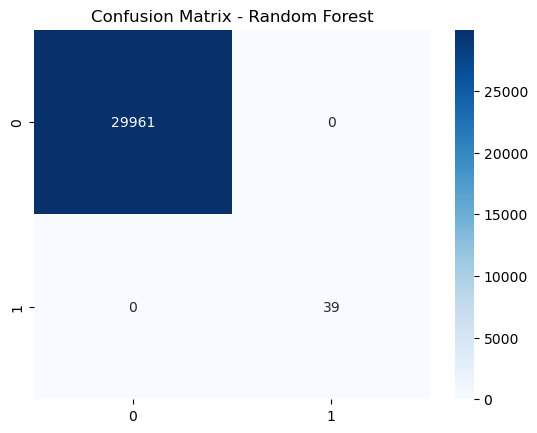

In [63]:
evaluate('Logistic Regression', lr)
evaluate('Random Forest', rf)

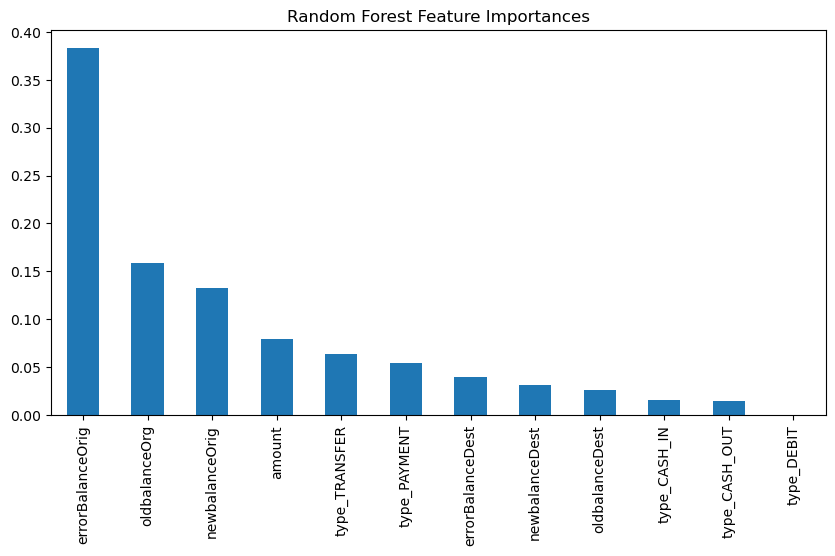

In [64]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,5))
plt.title('Random Forest Feature Importances')
plt.show()

In [65]:
df_nonfraud = df[df['isFraud'] == 0]
X_nonfraud = df_nonfraud[feature_cols]


In [66]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_nonfraud)


IsolationForest(contamination=0.01, random_state=42)

In [67]:
joblib.dump(iso_forest, 'iso_forest.joblib')

print("Both models saved as 'model.joblib' and 'iso_forest.joblib'")

Both models saved as 'model.joblib' and 'iso_forest.joblib'


In [39]:
joblib.dump(rf, 'model.joblib')
print("Model saved as model.joblib")

Model saved as model.joblib
